In [8]:
import pandas as pd
import numpy as np

# ------------------------- 1. 合并数据（纵向连接） -------------------------
# 修正：移除嵌套的赋值语句，使用单层列表结构
file_paths = [
    r"/home/user/data/2015年国内主要城市年度数据.csv",
    r"/home/user/data/2016年国内主要城市年度数据.csv",
    r"/home/user/data/2017年国内主要城市年度数据.csv"
]

# 读取并合并数据
dfs = []
for path in file_paths:
    # 假设 CSV 文件用逗号分隔，编码为 UTF-8（可根据实际情况调整）
    df = pd.read_csv(path, encoding='utf-8')  
    # 添加“年份”列（从文件名提取，如“2015年...”则年份为2015）
    # 修正：在Linux环境下使用正斜杠分割路径
    year = path.split("/")[-1].split("年")[0]  
    df["年份"] = int(year)  
    dfs.append(df)

# 纵向合并（按行拼接）
merged_df = pd.concat(dfs, ignore_index=True)  


# ------------------------- 2. 处理缺省值（填充为0） -------------------------
merged_df.fillna(0, inplace=True)  


# ------------------------- 3. 按年份聚合，求每年国内生产总值（GDP）总和 -------------------------
# 假设“国内生产总值”列名为“GDP”（需根据实际 CSV 列名调整！）
gdp_by_year = merged_df.groupby("年份")["GDP"].sum()  
print("每年国内生产总值总和：")
print(gdp_by_year)


# ------------------------- 4. 计算每个城市 2015-2017 年 GDP 年均增长率 -------------------------
# 整理数据：按城市和年份 pivot，方便计算
pivot_df = merged_df.pivot_table(
    index="城市", 
    columns="年份", 
    values="GDP",
    aggfunc='mean'  # 若同城市同年有多个数据，取均值；无则已填充为0
)

# 计算年均增长率（公式：[(GDP_2017 / GDP_2015) ^ (1/2) - 1] * 100 ）
def growth_rate(row):
    gdp_2015 = row.get(2015, 0)
    gdp_2017 = row.get(2017, 0)
    if gdp_2015 == 0:
        return np.nan  # 避免除以0
    return ((gdp_2017 / gdp_2015) ** (1/2) - 1) * 100

pivot_df["年均增长率(%)"] = pivot_df.apply(growth_rate, axis=1)

# 处理可能的 NaN（如 2015 年 GDP 为0的情况）
pivot_df["年均增长率(%)"].fillna(0, inplace=True)

# 找出增长率最高和最低的五个城市
top_5 = pivot_df["年均增长率(%)"].nlargest(5)
bottom_5 = pivot_df["年均增长率(%)"].nsmallest(5)

print("\nGDP 年均增长率最高的5个城市：")
print(top_5)
print("\nGDP 年均增长率最低的5个城市：")
print(bottom_5)


# ------------------------- 5. 对“医院、卫生院数”归一化（Min-Max 标准化）并分析变化 -------------------------
# 假设列名为“医院、卫生院数”（需根据实际 CSV 列名调整！）
col_name = "医院、卫生院数"
for year in [2015, 2016, 2017]:
    # 按年份筛选数据
    year_df = merged_df[merged_df["年份"] == year]  
    # Min-Max 标准化：(x - min) / (max - min)
    min_val = year_df[col_name].min()
    max_val = year_df[col_name].max()
    if max_val != min_val:
        year_df[f"{col_name}_归一化"] = (year_df[col_name] - min_val) / (max_val - min_val)
    else:
        # 若所有值相同，归一化为0
        year_df[f"{col_name}_归一化"] = 0  

    # 简单打印各城市归一化后结果（可按需扩展分析）
    print(f"\n{year}年 {col_name} 归一化结果：")
    print(year_df[["城市", f"{col_name}_归一化"]])


# ------------------------- 6. 提取北京、上海、广州、深圳的 GDP 和社会商品零售总额 -------------------------
# 假设“社会商品零售总额”列名为“社会商品零售总额”（需根据实际 CSV 列名调整！）
cities = ["北京", "上海", "广州", "深圳"]
columns = ["城市", "年份", "GDP", "社会商品零售总额"]

# 筛选数据
selected_df = merged_df[
    (merged_df["城市"].isin(cities)) & 
    (merged_df["年份"].between(2015, 2017))
][columns]

# 保存为新 CSV（路径修正为Linux格式）
selected_df.to_csv(r"/home/user/data/北上广深_2015-2017_GDP_零售数据.csv", index=False, encoding='utf-8')
print("\n北上广深数据已保存至：/home/user/data/北上广深_2015-2017_GDP_零售数据.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/user/data/2015年国内主要城市年度数据.csv'

In [2]:
import os

# 定义文件路径列表
file_paths = [
    r"E:\2015年国内主要城市年度数据.csv",
    r"E:\2016年国内主要城市年度数据.csv",
    r"E:\2017年国内主要城市年度数据.csv"
]

# 检查每个文件是否存在
for path in file_paths:
    if os.path.exists(path):
        print(f"文件存在: {path}")
    else:
        print(f"文件不存在: {path}")
        print(f"请检查路径是否正确，当前路径解析为: {os.path.abspath(path)}")

文件不存在: E:\2015年国内主要城市年度数据.csv
请检查路径是否正确，当前路径解析为: /home/c6df3c58-4c97-4402-a589-6e83790b7916/E:\2015年国内主要城市年度数据.csv
文件不存在: E:\2016年国内主要城市年度数据.csv
请检查路径是否正确，当前路径解析为: /home/c6df3c58-4c97-4402-a589-6e83790b7916/E:\2016年国内主要城市年度数据.csv
文件不存在: E:\2017年国内主要城市年度数据.csv
请检查路径是否正确，当前路径解析为: /home/c6df3c58-4c97-4402-a589-6e83790b7916/E:\2017年国内主要城市年度数据.csv


In [5]:
import os

if os.name == 'nt':  # Windows系统
    print("当前环境：Windows")
else:  # Linux/Unix/MacOS
    print("当前环境：Linux 或 macOS")

当前环境：Linux 或 macOS


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.

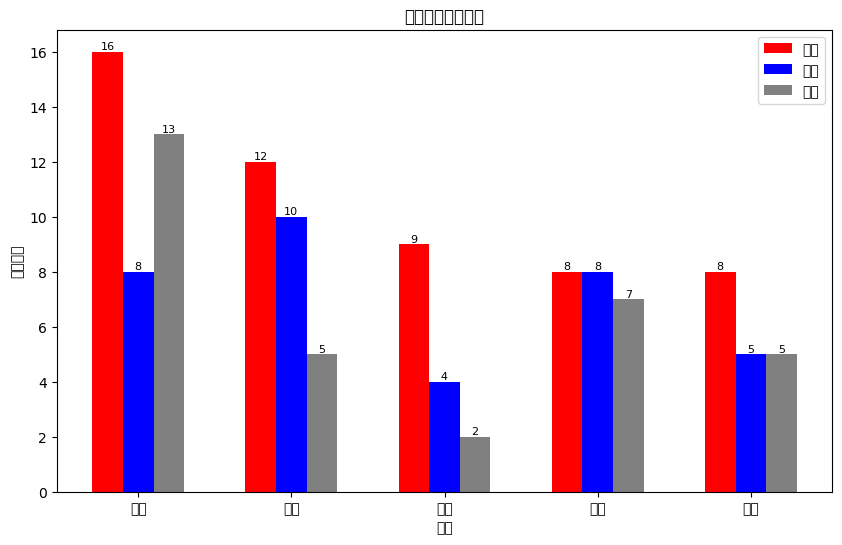

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 国家
countries = ['挪威', '德国', '中国', '美国', '瑞士']
# 金牌个数
gold_medal = np.array([16, 12, 9, 8, 8])
# 银牌个数
silver_medal = np.array([8, 10, 4, 8, 5])
# 铜牌个数
bronze_medal = np.array([13, 5, 2, 7, 5])

x = np.arange(len(countries))  # 创建x轴的数值序列

# 设置图形的大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(x - 0.2, gold_medal, width=0.2, color='gold', label='金牌')
plt.bar(x, silver_medal, width=0.2, color='gry', label='银牌')
plt.bar(x + 0.2, bronze_medal, width=0.2, color='grey', label='铜牌')

# 设置x轴的刻度标签
plt.xticks(x, countries)

# 添加文本标签
for i in x:
    # 金牌
    plt.text(x[i] - 0.2, gold_medal[i], gold_medal[i], va='bottom', ha='center', fontsize=8)
    # 银牌
    plt.text(x[i], silver_medal[i], silver_medal[i], va='bottom', ha='center', fontsize=8)
    # 铜牌
    plt.text(x[i] + 0.2, bronze_medal[i], bronze_medal[i], va='bottom', ha='center', fontsize=8)

# 添加标题和坐标轴标签
plt.title('各国奖牌数量对比')
plt.xlabel('国家')
plt.ylabel('奖牌数量')

# 添加图例
plt.legend()

# 显示图形
plt.show()